In [1]:
import torch
import numpy as np
import torch.optim
import matplotlib.pyplot as plt
from IPython.display import clear_output
import os
import sys
import pickle

In [2]:
sys.path.append('.')
sys.path.append('../src')

from dataset import Dataset
from models.model_segnet import SegNet
from models.model_unet import UNet
from loss import BCEWithLogits, dice_loss, focal_loss
from metrics import iou_pytorch
from inference import score_model

In [3]:
data_tr, data_val, data_ts = Dataset()
path = os.path.abspath('../')  # указывает предыдущий каталог каталога, в котором находится текущий файл

filepath0 = path + '\output\\history_sn_bce.txt'
filepath1 = path + '\output\\history_dice_sn.txt'
filepath2 = path + '\output\\history_focal_sn.txt'
filepath3 = path + '\output\\history_bce_unet.txt'
filepath4 = path + '\output\\history_focal_unet.txt'

In [4]:
with open(filepath0, 'rb') as f:
    history_bce_sn = pickle.load(f)
    
with open(filepath1, 'rb') as f:
    history_dice_sn = pickle.load(f)

with open(filepath2, 'rb') as f:
    history_focal_sn = pickle.load(f)
    
with open(filepath3, 'rb') as f:
    history_bce_unet = pickle.load(f)
    
with open(filepath4, 'rb') as f:
    history_focal_unet = pickle.load(f)

In [5]:
val_loss_sn_bce, val_acc_sn_bce = zip(*history_bce_sn)
val_loss_sn_dice, val_acc_sn_dice = zip(*history_dice_sn)
val_loss_sn_focal, val_acc_sn_focal = zip(*history_focal_sn)
val_loss_unet_bce, val_acc_unet_bce = zip(*history_bce_unet)
val_loss_unet_focal,val_acc_unet_focal = zip(*history_focal_unet)

In [6]:
path0 = path + '\output\\Segnet_BCE.pth'
path1 = path + '\output\\Segnet_Dice.pth'
path2 = path + '\output\\Segnet_Focal.pth'
path3 = path + '\output\\Unet_BCE.pth'
path4 = path + '\output\\Unet_Focal.pth'

In [7]:
model_sn_bce = SegNet()
model_sn_bce.load_state_dict(torch.load(path0, map_location=torch.device('cpu')))

model_sn_dice = SegNet()
model_sn_dice.load_state_dict(torch.load(path1, map_location=torch.device('cpu')))

model_sn_focal = SegNet()
model_sn_focal.load_state_dict(torch.load(path2, map_location=torch.device('cpu')))

model_unet_bce = UNet()
model_unet_bce.load_state_dict(torch.load(path3, map_location=torch.device('cpu')))

model_unet_focal = UNet()
model_unet_focal.load_state_dict(torch.load(path4, map_location=torch.device('cpu')))

<All keys matched successfully>

In [8]:
def score(model):
    return score_model(model, iou_pytorch, data_ts)

In [9]:
def plot_val(val_loss):
    plt.figure(figsize=(5, 3))
    plt.plot(val_loss, label="val_loss")
    plt.legend(loc='best')
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.show()

In [10]:
def plot_acc(val_acc):
    plt.figure(figsize=(5, 3))
    plt.plot(val_acc, label="val_acc")
    plt.legend(loc='best')
    plt.xlabel("epochs")
    plt.ylabel("bce_acc")
    plt.show()

### SegNet + BCE loss

0.8193730473518371


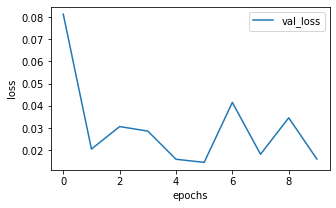

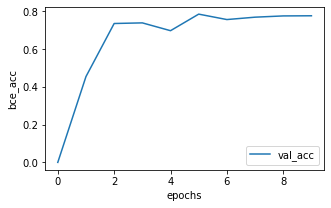

In [11]:
score_sn_bce = score(model_sn_bce)
print(score_sn_bce)
plot_val(val_loss_sn_bce)
plot_acc(val_acc_sn_bce)

### SegNet + Dice loss

0.8276420056819915


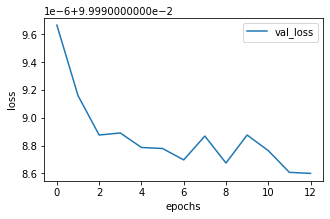

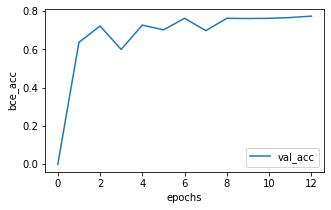

In [12]:
score_sn_dice = score(model_sn_dice)
print(score_sn_dice)
plot_val(val_loss_sn_dice)
plot_acc(val_acc_sn_dice)

### SegNet + Focal loss

0.8068815231323242


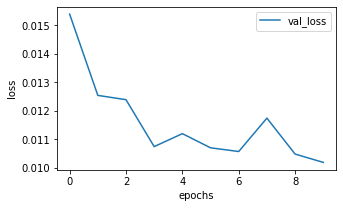

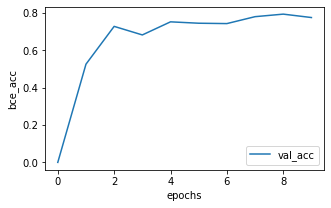

In [13]:
score_sn_focal = score(model_sn_focal)
print(score_sn_focal)
plot_val(val_loss_sn_focal)
plot_acc(val_acc_sn_focal)

### UNet + BCE loss

0.7945480048656464


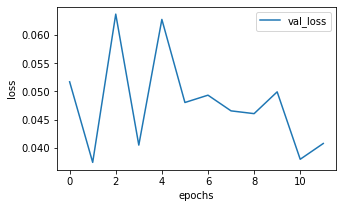

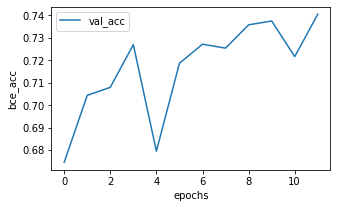

In [14]:
score_unet_bce = score(model_unet_bce)
print(score_unet_bce)
plot_val(val_loss_unet_bce)
plot_acc(val_acc_unet_bce)

### UNet + Focal loss

0.7852159917354584


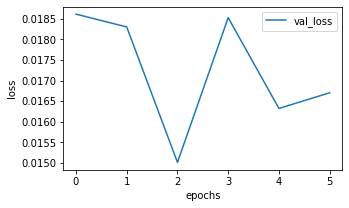

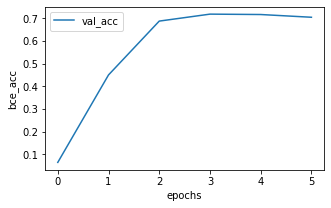

In [15]:
score_unet_focal = score(model_unet_focal)
print(score_unet_focal)
plot_val(val_loss_unet_focal)
plot_acc(val_acc_unet_focal)

## Comparisons

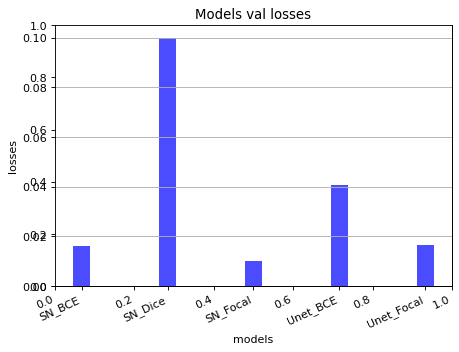

In [16]:
data_values = [val_loss_sn_bce[-1], val_loss_sn_dice[-1], val_loss_sn_focal[-1], val_loss_unet_bce[-1], val_loss_unet_focal[-1]]
data_names = ['SN_BCE', 'SN_Dice', 'SN_Focal', 'Unet_BCE', 'Unet_Focal']
dpi = 80
fig = plt.figure(dpi = dpi, figsize = (512 / dpi, 384 / dpi))
plt.title('Models val losses')
ax = plt.axes()
plt.xlabel("models")
plt.ylabel("losses")
ax.yaxis.grid(True, zorder = 1)
xs = range(len(data_names))
plt.bar([x for x in xs],data_values,
        width = 0.2, color = 'blue', alpha = 0.7)
plt.xticks(xs, data_names)
fig.autofmt_xdate(rotation = 25)

Видим, что лосс всех моделей в районе 0, самый высокий лосс у SegNet Dice, но обучение на ~ 20 эпохах не давало значительного улучшения, поэтому я посчитала нецелесообразным обучать 20+ эпох.

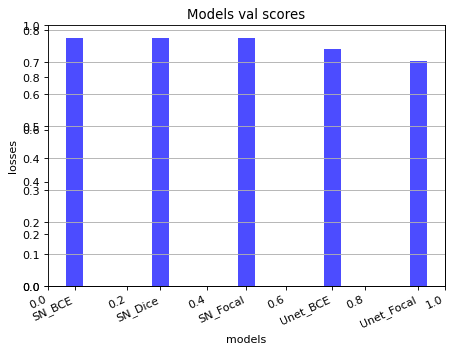

In [17]:
data_values = [val_acc_sn_bce[-1], val_acc_sn_dice[-1], val_acc_sn_focal[-1], val_acc_unet_bce[-1], val_acc_unet_focal[-1]]
data_names = ['SN_BCE', 'SN_Dice', 'SN_Focal', 'Unet_BCE', 'Unet_Focal']
dpi = 80
fig = plt.figure(dpi = dpi, figsize = (512 / dpi, 384 / dpi))
plt.title('Models val scores')
ax = plt.axes()
plt.xlabel("models")
plt.ylabel("losses")
ax.yaxis.grid(True, zorder = 1)
xs = range(len(data_names))
plt.bar([x for x in xs],data_values,
        width = 0.2, color = 'blue', alpha = 0.7)
plt.xticks(xs, data_names)
fig.autofmt_xdate(rotation = 25)

Если сравнить скор на валидации и тесте, увидим,что радикальных различий нет.

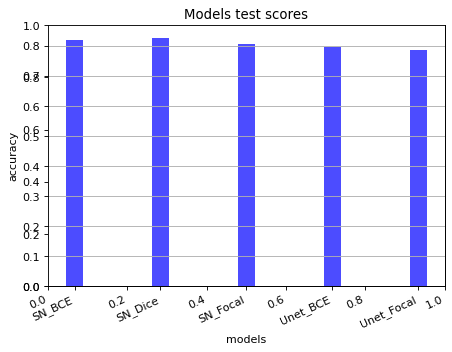

In [18]:
data_values = [score_sn_bce, score_sn_dice, score_sn_focal, score_unet_bce, score_unet_focal]
data_names = ['SN_BCE', 'SN_Dice', 'SN_Focal', 'Unet_BCE', 'Unet_Focal']
dpi = 80
fig = plt.figure(dpi = dpi, figsize = (512 / dpi, 384 / dpi))
plt.title('Models test scores')
ax = plt.axes()
plt.xlabel("models")
plt.ylabel("accuracy")
ax.yaxis.grid(True, zorder = 1)
xs = range(len(data_names))
plt.bar([x for x in xs],data_values,
        width = 0.2, color = 'blue', alpha = 0.7)
plt.xticks(xs, data_names)
fig.autofmt_xdate(rotation = 25)

Видим, что скор на тесте у SegNet BCE и SegNet Dice практически одинаковый, но SegNet BCE - наиболее стабильная модель из всех, сходится за ~10 эпох